In [1]:
# Optimization of an International Portfolio

In [2]:
# install libraries that are not installed in colab by default
! pip install cvxpy riskfolio-lib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.6/307.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 14.0 MB/s eta 0:00:00


In [3]:
# Download CSV file to colab instance (or upload your own file).
! wget https://raw.githubusercontent.com/eriramirez/ProgFin/main/ACTIVOS%20Actinver%20PAMA%20para%20python.csv

--2024-06-04 01:39:06--  https://raw.githubusercontent.com/eriramirez/ProgFin/main/ACTIVOS%20Actinver%20PAMA%20para%20python.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18347374 (17M) [text/plain]
Saving to: ‘ACTIVOS Actinver PAMA para python.csv’

ACTIVOS Actinver PA 100%[===================>]  17.50M  71.8MB/s    in 0.2s    

2024-06-04 01:39:07 (71.8 MB/s) - ‘ACTIVOS Actinver PAMA para python.csv’ saved [18347374/18347374]



In [4]:
# Import libraries

import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from typing import Dict, List
import cvxpy as cp
import riskfolio as rp

In [17]:
df = pd.read_csv("ACTIVOS Actinver PAMA para python.csv")

df["Date"] = df["Date"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
df.set_index("Date", inplace=True)
df

,AAL,AAPL,AAU,AAXJ,ABBV,ABNB,AC,ACTDUALB.MX,ACTI500B.MX,ACTICOBB.MX,...,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094137,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095535,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095768,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093671,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093438,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,14.48,184.320007,0.1465,70.650002,160.399994,147.050003,33.349998,0.18494,6.03929,21.812349,...,5.18,60.439999,97.190002,38.170002,94.349998,41.669998,204.779999,143.300003,117.485733,61.130001
2024-05-10,14.40,183.050003,0.1465,70.989998,160.750000,146.320007,32.919998,0.18468,6.03625,21.681431,...,5.13,60.480000,96.389999,38.020000,93.830002,41.830002,205.539993,143.589996,117.009598,61.970001
2024-05-13,14.93,186.279999,0.1465,71.599998,161.279999,149.130005,33.189999,0.18476,6.04172,21.675051,...,5.57,60.410000,97.989998,37.970001,93.580002,41.660000,206.509995,143.449997,116.960007,63.110001


In [18]:
# drop columns with no information
df = df.dropna(axis=1,how='all')
df

,AAL,AAPL,AAU,AAXJ,ABBV,ABNB,AC,ACTDUALB.MX,ACTI500B.MX,ACTICOBB.MX,...,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094137,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095535,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095768,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093671,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093438,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,14.48,184.320007,0.1465,70.650002,160.399994,147.050003,33.349998,0.18494,6.03929,21.812349,...,5.18,60.439999,97.190002,38.170002,94.349998,41.669998,204.779999,143.300003,117.485733,61.130001
2024-05-10,14.40,183.050003,0.1465,70.989998,160.750000,146.320007,32.919998,0.18468,6.03625,21.681431,...,5.13,60.480000,96.389999,38.020000,93.830002,41.830002,205.539993,143.589996,117.009598,61.970001
2024-05-13,14.93,186.279999,0.1465,71.599998,161.279999,149.130005,33.189999,0.18476,6.04172,21.675051,...,5.57,60.410000,97.989998,37.970001,93.580002,41.660000,206.509995,143.449997,116.960007,63.110001


In [19]:
# Drop old dates
start = datetime(2019,1,1)
df = df[df.index > start]
df

,AAL,AAPL,AAU,AAXJ,ABBV,ABNB,AC,ACTDUALB.MX,ACTI500B.MX,ACTICOBB.MX,...,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,31.963156,37.793774,0.6980,57.578552,69.330475,NaN,34.519871,NaN,3.56200,25.674910,...,NaN,28.534632,99.234459,17.778921,45.037312,21.587917,58.802830,77.852409,53.034836,NaN
2019-01-03,29.581667,34.029240,0.6886,56.218712,67.046120,NaN,35.023525,NaN,3.54813,25.558460,...,NaN,28.387894,98.274445,17.750107,44.590637,21.102589,55.835209,76.271599,52.220570,NaN
2019-01-04,31.530163,35.481922,0.7088,58.071381,69.206161,NaN,34.868549,NaN,3.46932,25.613630,...,NaN,28.565203,102.238121,19.536642,46.107796,21.803616,58.309818,78.546867,54.145927,NaN
2019-01-07,32.425682,35.402943,0.6900,58.418186,70.216240,NaN,36.854126,NaN,3.55211,25.372860,...,NaN,28.901482,104.053612,19.642302,46.793221,21.830576,58.831291,78.848412,54.427490,NaN
2019-01-08,31.904114,36.077835,0.7300,58.573330,70.542557,NaN,37.047836,NaN,3.56833,25.304340,...,NaN,29.103247,107.313904,19.882427,47.155178,21.848553,59.324310,79.460640,54.823215,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09,14.480000,184.320007,0.1465,70.650002,160.399994,147.050003,33.349998,0.18494,6.03929,21.812349,...,5.18,60.439999,97.190002,38.170002,94.349998,41.669998,204.779999,143.300003,117.485733,61.130001
2024-05-10,14.400000,183.050003,0.1465,70.989998,160.750000,146.320007,32.919998,0.18468,6.03625,21.681431,...,5.13,60.480000,96.389999,38.020000,93.830002,41.830002,205.539993,143.589996,117.009598,61.970001
2024-05-13,14.930000,186.279999,0.1465,71.599998,161.279999,149.130005,33.189999,0.18476,6.04172,21.675051,...,5.57,60.410000,97.989998,37.970001,93.580002,41.660000,206.509995,143.449997,116.960007,63.110001


In [8]:
df.columns.tolist()

['Date',
 'AAL',
 'AAPL',
 'AAU',
 'AAXJ',
 'ABBV',
 'ABNB',
 'AC',
 'ACTDUALB.MX',
 'ACTI500B.MX',
 'ACTICOBB.MX',
 'ACTICREB.MX',
 'ACTIG+2B.MX',
 'ACTIG+B.MX',
 'ACTIGOBB.MX',
 'ACTIMEDB.MX',
 'ACTINMOB.MX',
 'ACTIPLUB.MX',
 'ACTIRENB.MX',
 'ACTIVARB.MX',
 'ACTOTALB.MX',
 'ACWI',
 'AFRM',
 'AGNC',
 'ALFAA.MX',
 'ALPEKA.MX',
 'ALSEA.MX',
 'AMAT',
 'AMD',
 'AMXB.MX',
 'AMZN',
 'APA',
 'ASURB.MX',
 'ATER',
 'ATOS',
 'AVGO',
 'AXP',
 'BA',
 'BABA',
 'BAC',
 'BBAJIOO.MX',
 'BIL',
 'BIMBOA.MX',
 'BMY',
 'BNGO',
 'BOLSAA.MX',
 'BOTZ',
 'BRK-B',
 'BYND',
 'C',
 'CAT',
 'CCL',
 'CEMEXCPO.MX',
 'CHDRAUIB.MX',
 'CLF',
 'COST',
 'CPE',
 'CRM',
 'CSCO',
 'CUERVO.MX',
 'CVS',
 'CVX',
 'DAL',
 'DIA',
 'DIGITALB.MX',
 'DINAMOB.MX',
 'DIS',
 'DVN',
 'EEM',
 'ELEKTRA.MX',
 'ESCALAB.MX',
 'ESFERAB.MX',
 'ETSY',
 'EWZ',
 'F',
 'FANG',
 'FAS',
 'FCX',
 'FDX',
 'FEMSAUBD.MX',
 'FIBRAMQ12.MX',
 'FIBRAPL14.MX',
 'FSLR',
 'FUBO',
 'FUNO11.MX',
 'GAPB.MX',
 'GCARSOA1.MX',
 'GCC.MX',
 'GDX',
 'GE',
 'GENTERA.

In [20]:
assets = ['VYM', 'VZ', 'WALMEX.MX', 'WFC', 'WISH', 'WMT', 'WYNN', 'X', 'XLE',
 'XLF',
 'XLK',
 'XLV',
 'XOM',]

Y = df.pct_change().dropna()
display(Y.head())
#pct_change_df = data.pct_change()

,AAL,AAPL,AAU,AAXJ,ABBV,ABNB,AC,ACTDUALB.MX,ACTI500B.MX,ACTICOBB.MX,...,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-30,-0.017143,-0.030039,0.032864,-0.005775,-0.059627,-0.015188,0.011279,0.000965,-0.017318,0.002991,...,-0.096294,-0.019282,-0.020513,-0.022654,-0.007989,-0.009138,-0.019158,-0.013762,-0.015449,-0.011817
2022-10-03,-0.009967,0.030752,0.022727,0.009568,0.030624,-0.000381,0.036725,-0.000362,-0.018832,-0.003484,...,0.112958,0.021820,0.025067,0.070088,0.056512,0.027009,0.030982,0.020560,0.052800,0.004756
2022-10-04,0.086409,0.025623,0.068889,0.033677,0.026533,0.055333,0.016006,0.000060,0.020769,-0.004040,...,0.064030,0.012978,0.094877,0.053636,0.042975,0.037203,0.033562,0.023220,0.036445,0.048688
2022-10-05,-0.006178,0.002053,-0.005405,0.001965,0.009437,0.008573,0.000000,-0.000482,0.027439,-0.003318,...,-0.010356,-0.009907,0.020356,-0.011747,0.020665,-0.007730,0.003318,0.003321,0.040412,-0.000258
2022-10-06,-0.010878,-0.006626,0.024248,-0.007190,-0.021210,-0.001611,0.033058,0.000724,0.000475,0.002775,...,-0.013952,-0.009329,0.027570,-0.028232,0.017778,-0.014023,-0.008190,-0.012767,0.029661,0.010707


In [10]:

# Building the portfolio object
port = rp.Portfolio(returns = Y)

#Calculating optimal portfolio

#Select method and estimate input parameters
method_mu = 'hist' # method to estimate expected returns based on historical data
method_cov = 'hist' # method to estimate covariance matrix based on historical data

port.assets_stats(method_mu = method_mu, method_cov = method_cov, d = 0.94)

#Estimate optimal portfolio
model = "Classic" # Could be Classic (historical), BL (Black Litterman), or FM (FActor Model)
rm = "MV" # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility of Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk Free Rate
l = 0 # Risk aversion factor, unly useful when objective is 'Utility'

w = port.optimization(model=model, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,VYM,VZ,WALMEX.MX,WFC,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM
weights,2.052685e-09,7.702737e-10,0.088303,0.114341,7.534867e-11,0.071267,4.183710e-10,0.010357,2.571547e-09,1.636072e-09,0.181005,0.088278,0.446449


array([<Axes: title={'center': 'Copyright (c) 2020-2024, Dany Cajas. All rights reserved.'}>,
       <Axes: title={'center': 'Historical Compounded Cumulative Returns'}>,
       <Axes: title={'center': 'Portfolio Composition'}>,
       <Axes: title={'center': 'Risk (Standard Deviation) Contribution per Asset'}>,
       <Axes: title={'center': 'Portfolio Returns Histogram'}, ylabel='Probability Density'>,
       <Axes: title={'center': 'Historical Uncompounded Drawdown'}>],
      dtype=object)

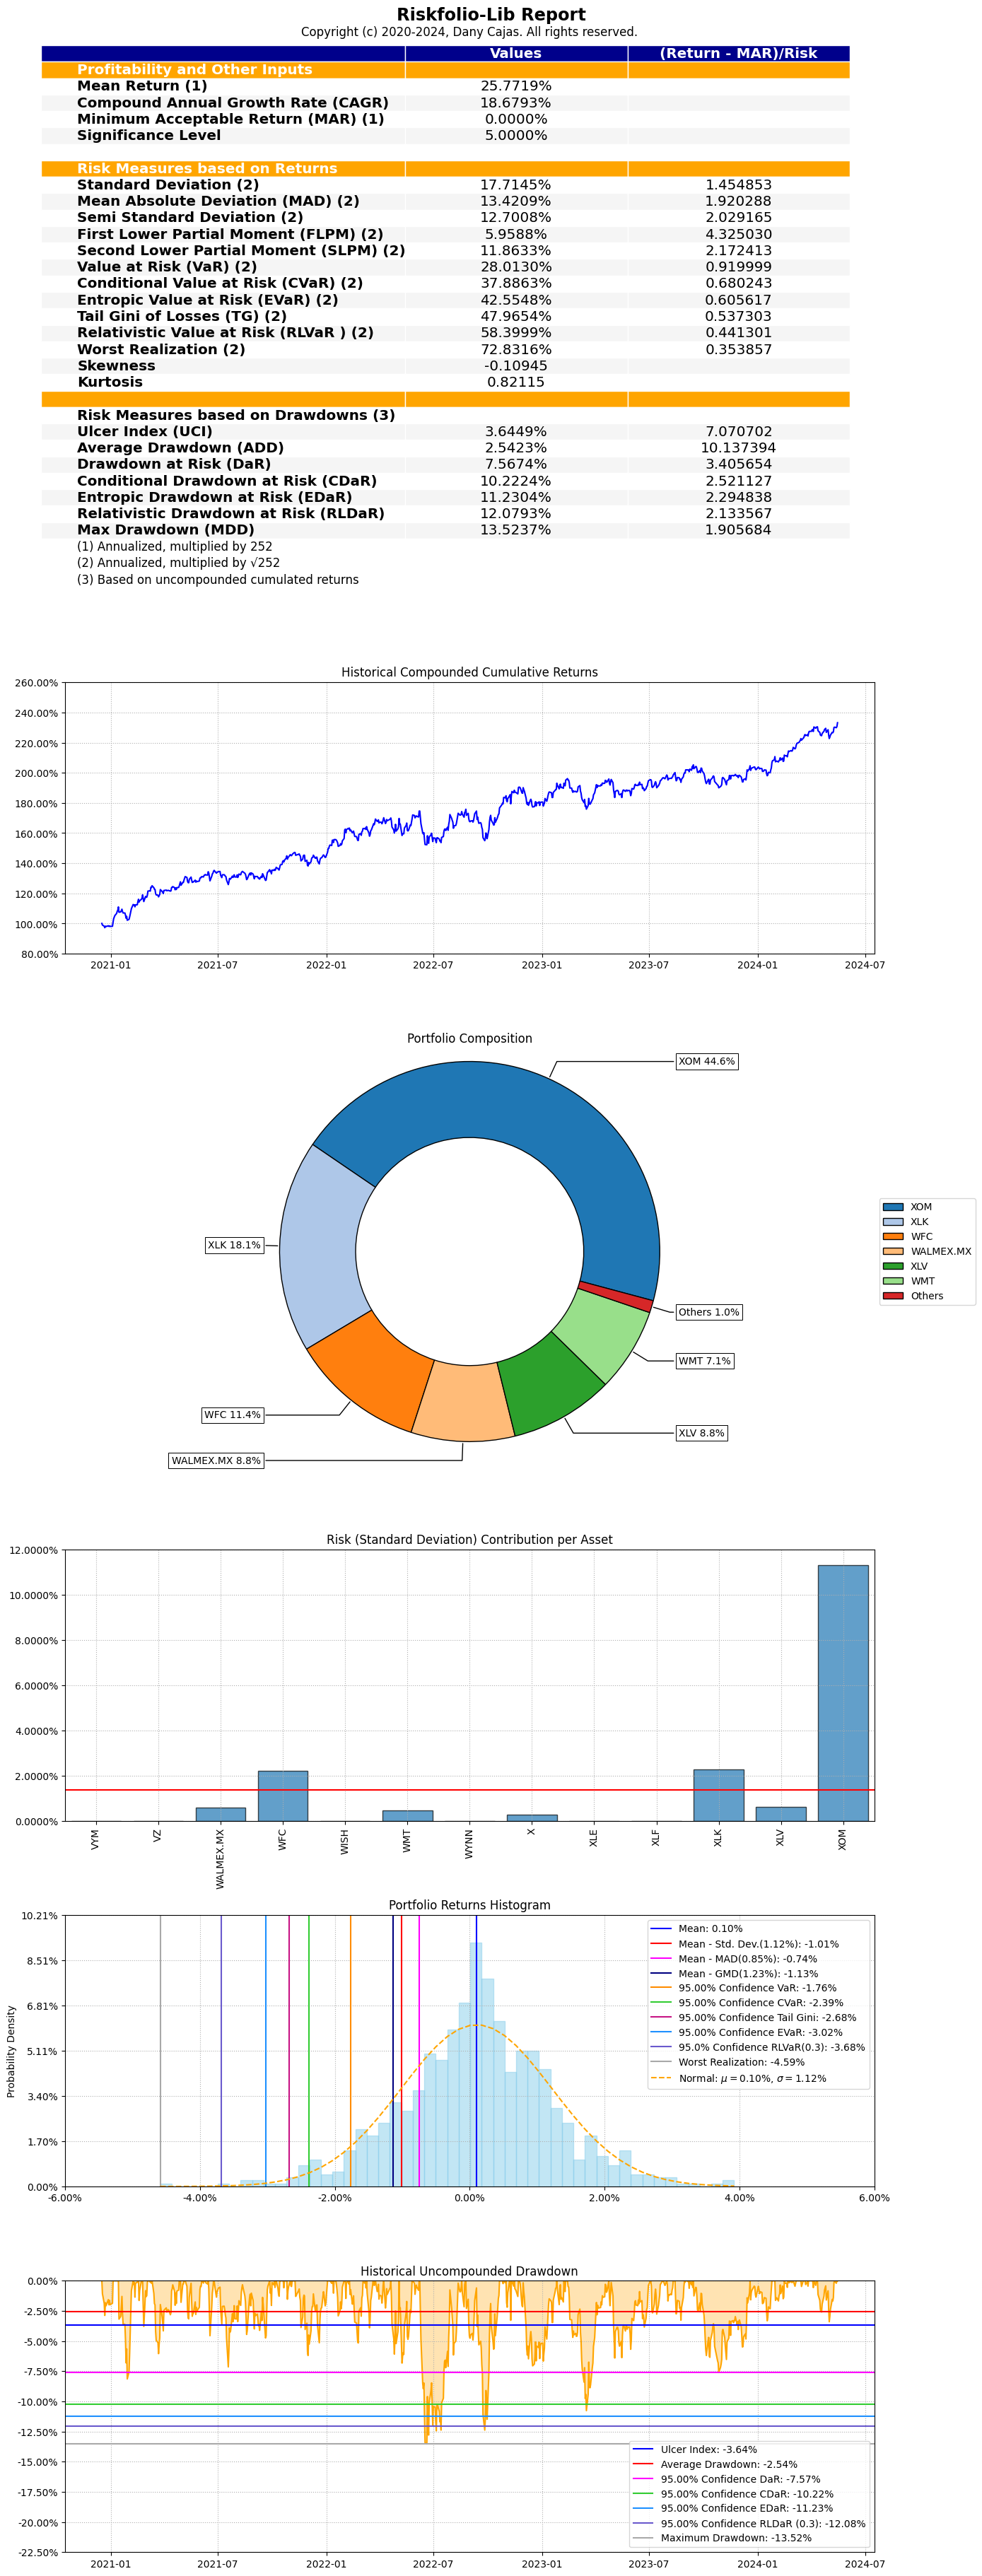

In [11]:
rp.Reports.jupyter_report(Y, w)

In [ ]:
rp.Reports.excel_report(
    Y,
    w,
    rf=0,
    alpha=0.05,
    t_factor=252,
    ini_days=1,
    days_per_year=252,
    name=r"C:\Users\L00616607\Developer\ProgFin\python port1.xlsx",
)


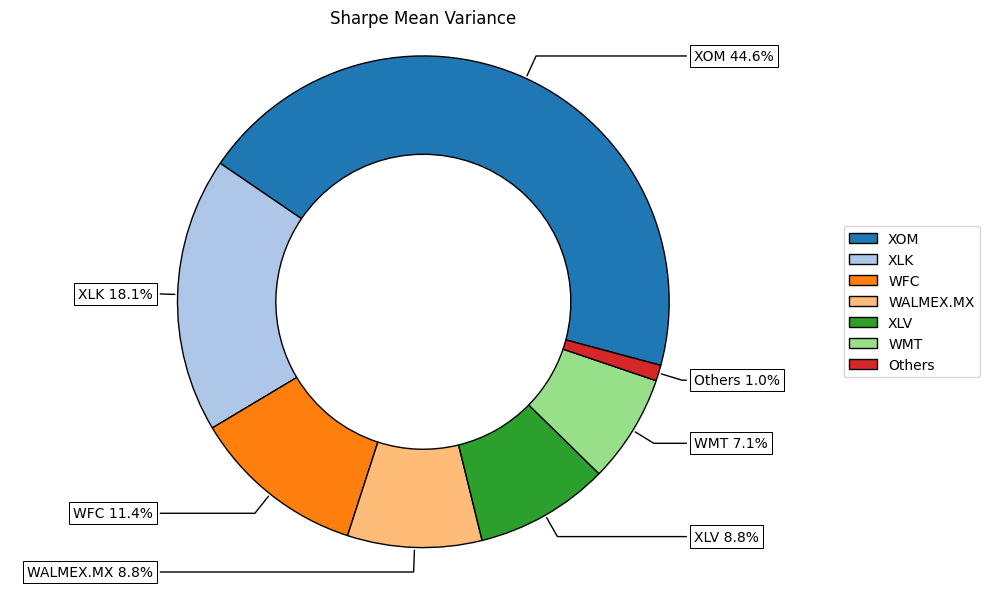

In [ ]:
# Ploting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=len(df.columns),
                cmap='tab20', height=6, width=10, ax=None)

In [ ]:
ann_mean_return = ((1 + Y.mean())**252)-1
print(ann_mean_return)

VYM          0.128082
VZ          -0.033578
WALMEX.MX    0.101814
WFC          0.322995
WISH        -0.572264
WMT          0.097691
WYNN         0.047425
X            0.446041
XLE          0.380681
XLF          0.158758
XLK          0.200045
XLV          0.107381
XOM          0.445581
dtype: float64


In [ ]:
ann_stdev = Y.std() * (252**(1/2))
print(ann_stdev)

VYM          0.139273
VZ           0.201529
WALMEX.MX    0.253673
WFC          0.304639
WISH         0.994777
WMT          0.192810
WYNN         0.427232
X            0.564155
XLE          0.280115
XLF          0.190133
XLK          0.235094
XLV          0.138431
XOM          0.285276
dtype: float64


In [ ]:
Y.cov()

,VYM,VZ,WALMEX.MX,WFC,WISH,WMT,WYNN,X,XLE,XLF,XLK,XLV,XOM
VYM,0.000077,0.000048,0.000028,0.000117,0.000160,0.000043,0.000106,0.000137,0.000097,0.000095,0.000085,0.000057,0.000088
VZ,0.000048,0.000161,0.000017,0.000061,0.000051,0.000030,0.000029,0.000063,0.000045,0.000051,0.000027,0.000040,0.000049
WALMEX.MX,0.000028,0.000017,0.000255,0.000034,0.000035,0.000024,0.000053,0.000092,0.000025,0.000034,0.000027,0.000021,0.000025
WFC,0.000117,0.000061,0.000034,0.000368,0.000219,0.000036,0.000198,0.000228,0.000152,0.000188,0.000108,0.000064,0.000135
WISH,0.000160,0.000051,0.000035,0.000219,0.003927,0.000093,0.000525,0.000371,0.000193,0.000210,0.000341,0.000125,0.000171
WMT,0.000043,0.000030,0.000024,0.000036,0.000093,0.000148,0.000029,0.000069,0.000035,0.000041,0.000050,0.000039,0.000034
WYNN,0.000106,0.000029,0.000053,0.000198,0.000525,0.000029,0.000724,0.000259,0.000160,0.000153,0.000177,0.000060,0.000135
X,0.000137,0.000063,0.000092,0.000228,0.000371,0.000069,0.000259,0.001263,0.000227,0.000192,0.000155,0.000083,0.000203
XLE,0.000097,0.000045,0.000025,0.000152,0.000193,0.000035,0.000160,0.000227,0.000311,0.000112,0.000065,0.000039,0.000299
XLF,0.000095,0.000051,0.000034,0.000188,0.000210,0.000041,0.000153,0.000192,0.000112,0.000143,0.000108,0.000064,0.000098


In [ ]:
w.round(4)

,weights
VYM,0.0000
VZ,0.0000
WALMEX.MX,0.0883
WFC,0.1143
WISH,0.0000
WMT,0.0713
WYNN,0.0000
X,0.0104
XLE,0.0000
XLF,0.0000
